In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install Xgboost
from xgboost import XGBClassifier
from sklearn .svm import LinearSVC, SVC
from sklearn .naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loaded data
df = pd.read_csv(r"/Users/maryann/Downloads/CustomerChurn.csv")


In [3]:
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
#converting "TotalCharges" to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### EXPLORATIVE DATA ANALYSIS
#Descriptive Analysis

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Numerical

df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#Categorical

df.describe(include = ["object"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [10]:
#investigating missing values

print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: >

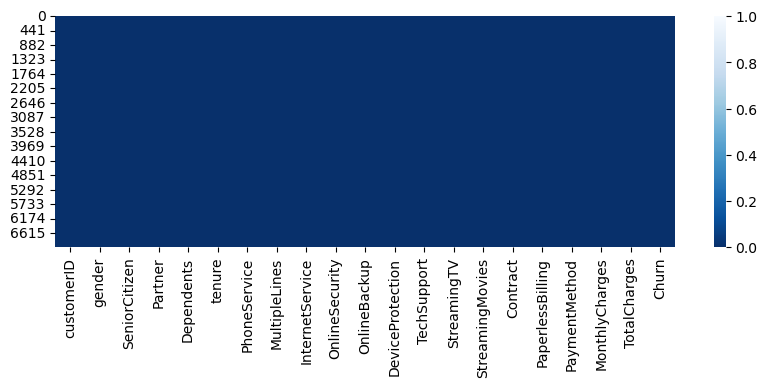

In [12]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(),cbar=True, cmap="Blues_r")

# data set column (total charges) has 11 missing values 

In [13]:
df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# Investigating Outliers

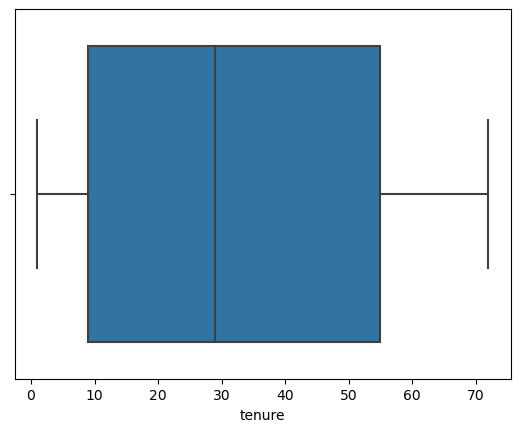

In [16]:
sns.boxplot(x=df["tenure"]);

# do not have outliers (have normal distribution of numerical data)

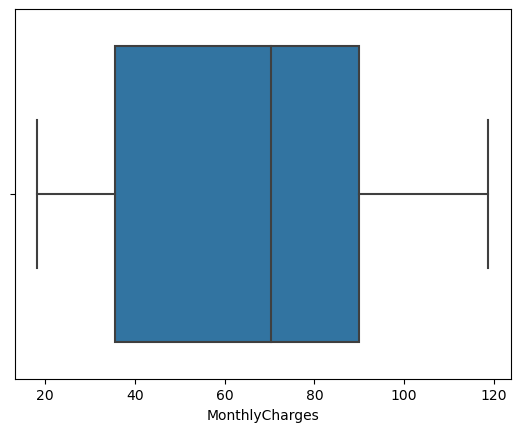

In [17]:
sns.boxplot(x=df["MonthlyCharges"]);

# do not have outliers (have normal distribution of numerical data)

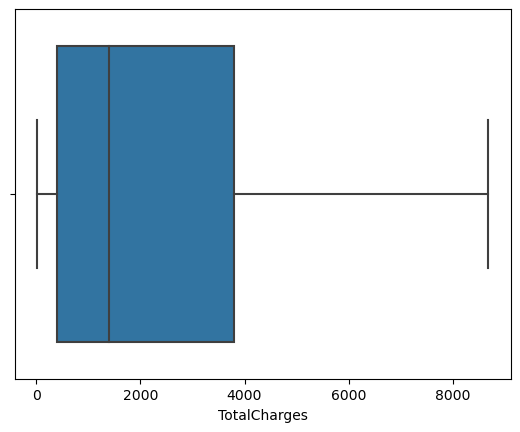

In [18]:
sns.boxplot(x=df["TotalCharges"]);

### Univariate Analysis

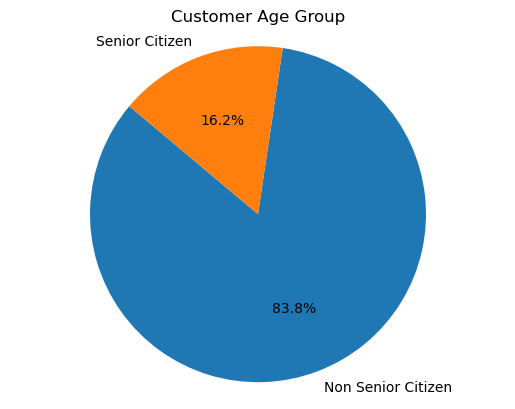

In [19]:
# investigating customer age bracket

def AgeBracket (SeniorCitizen):
    if SeniorCitizen <=0:
        return "Non Senior Citizen"
    else:
        return "Senior Citizen"
    
df['AgeBracket']=df['SeniorCitizen'].apply(AgeBracket)

age_bracket_counts = df['AgeBracket'].value_counts()

plt.pie(age_bracket_counts, labels=age_bracket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Age Group')
plt.axis('equal');

# Majority of customers are non senior citizens

In [20]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AgeBracket
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Non Senior Citizen
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Non Senior Citizen
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Non Senior Citizen
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Non Senior Citizen
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Non Senior Citizen


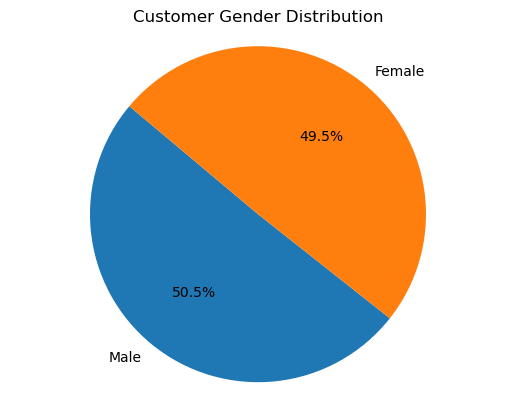

In [21]:
# Investigating gender distribution

gender_counts = df['gender'].value_counts()

# Plot pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Gender Distribution')
plt.axis('equal'); 

# there is almost equal distribution of both male and female gender of customers
#male customers are slightly more than the female customers

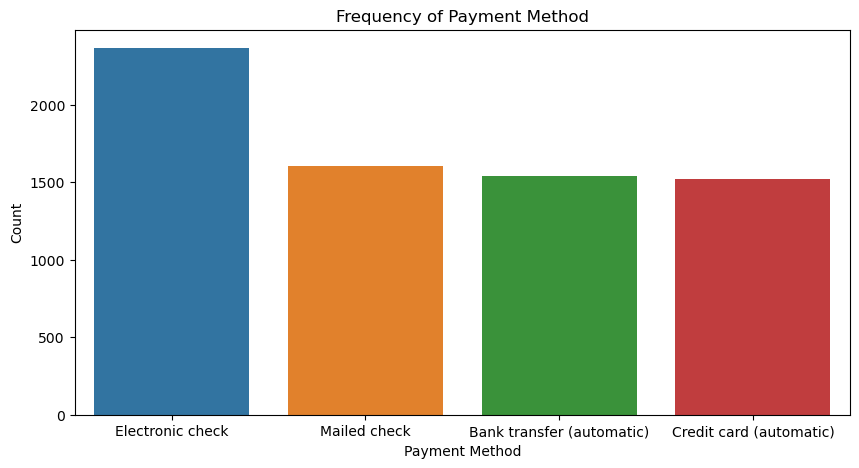

In [22]:
#investigating most used payment method preference

plt.figure(figsize= (10,5))
sns.countplot(x='PaymentMethod', data = df)
plt.xlabel ('Payment Method')
plt.ylabel ('Count')
plt.title('Frequency of Payment Method');

# Electronic check payment method is most used or preferd by customers compared to other payment methods which have an equal distribution in preference by customers

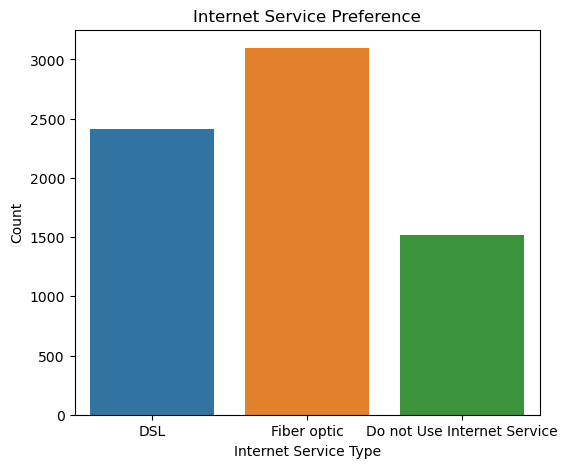

In [23]:
#investigating type of internet service used 

def InternetServicePreference (InternetService):
    if InternetService == 'No':
        return "Do not Use Internet Service"
    elif InternetService == 'DSL':
        return "DSL"
    else:
        return 'Fiber optic'
    
    
df['InternetServicePreference']=df['InternetService'].apply(InternetServicePreference)

plt.figure(figsize= (6,5))
sns.countplot(x='InternetServicePreference', data = df)
plt.xlabel ('Internet Service Type')
plt.ylabel ('Count')
plt.title('Internet Service Preference');

#more customers use fiber optic compared to DSL however, few customers do not use internet service at all but only phone service.

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AgeBracket,InternetServicePreference
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Non Senior Citizen,DSL
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Non Senior Citizen,DSL
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Non Senior Citizen,DSL
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Non Senior Citizen,DSL
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Non Senior Citizen,Fiber optic


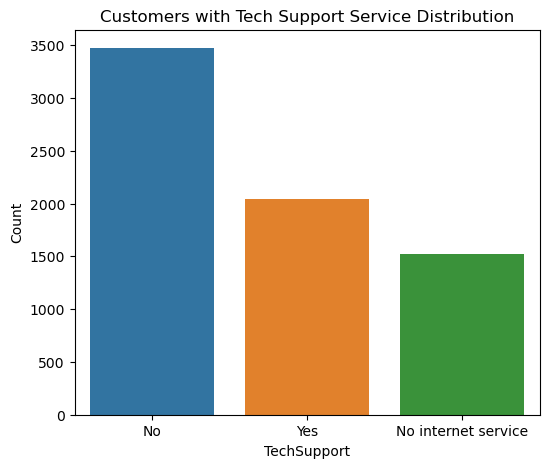

In [25]:
#investigating 'tech support' distribution

plt.figure(figsize= (6,5))
sns.countplot(x='TechSupport', data = df)
plt.xlabel ('TechSupport')
plt.ylabel ('Count')
plt.title('Customers with Tech Support Service Distribution');

# majority of customers do not have tech support service while a good number of customers do not have internet service.

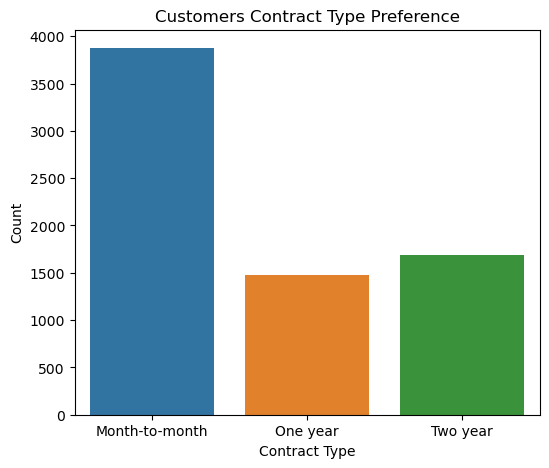

In [26]:
#investigating distribution of customers prefered contract type

plt.figure(figsize= (6,5))
sns.countplot(x='Contract', data = df)
plt.xlabel ('Contract Type')
plt.ylabel ('Count')
plt.title('Customers Contract Type Preference');

there are far more customers on monthly contract type than the yearly contract type

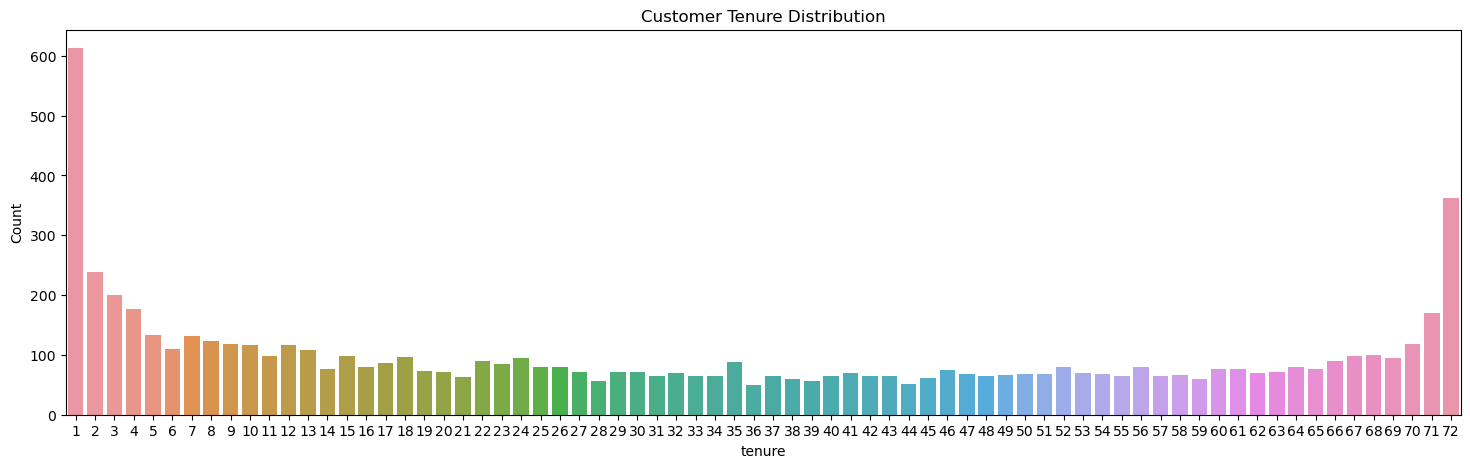

In [27]:
#investigating distribution of customers tenure

plt.figure(figsize= (18,5))
sns.countplot(x='tenure', data = df)
plt.xlabel ('tenure')
plt.ylabel ('Count')
plt.title('Customer Tenure Distribution');

the total number of customers are more at the beginning of the tenure and quite a number towrads the end. There's a fairly distributed number in the middle.

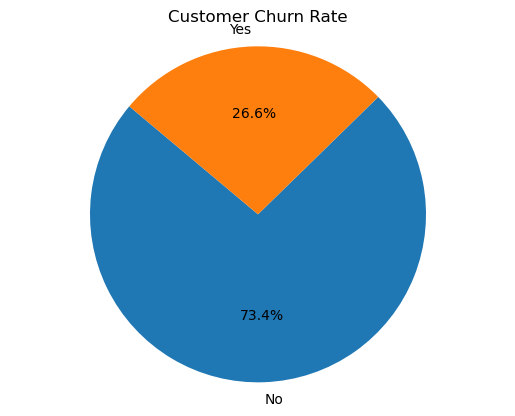

In [28]:
#investigating total churn

churn_counts = df['Churn'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Rate')
plt.axis('equal')

plt.show()

number of customers that did not churn are far larger than customers that churned

### Bivariate Analysis

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AgeBracket', 'InternetServicePreference'],
      dtype='object')

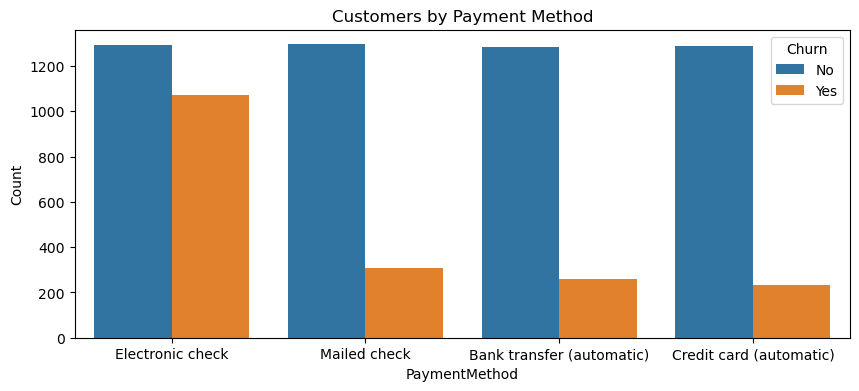

In [30]:
#investigating correlation between payment method and churn
plt.figure(figsize= (10,4))
sns.countplot(x='PaymentMethod', data = df, hue='Churn')
plt.xlabel ('PaymentMethod')
plt.ylabel ('Count')
plt.title('Customers by Payment Method');

#findings from Univ. analysis carried out previously shows that Electronic Check is the most used payment method.
# and it is discovered that it has a very high negative effect on customer churn

Findings from Univ. analysis carried out previously shows that Electronic Check is the most used payment method.
And it is discovered that it has a very high negative effect on customer churn

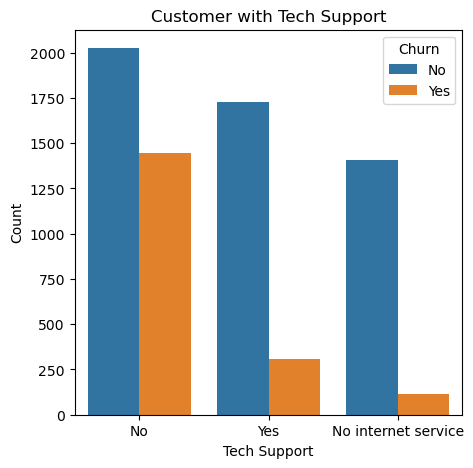

In [31]:
#investigating correlation between tech support and churn

plt.figure(figsize= (5,5))
sns.countplot(x='TechSupport', data = df, hue='Churn')
plt.xlabel ('Tech Support')
plt.ylabel ('Count')
plt.title('Customer with Tech Support');

Customers who do not have tech support churn very highly than customers who do not have tech support and customers who do not use internet service.

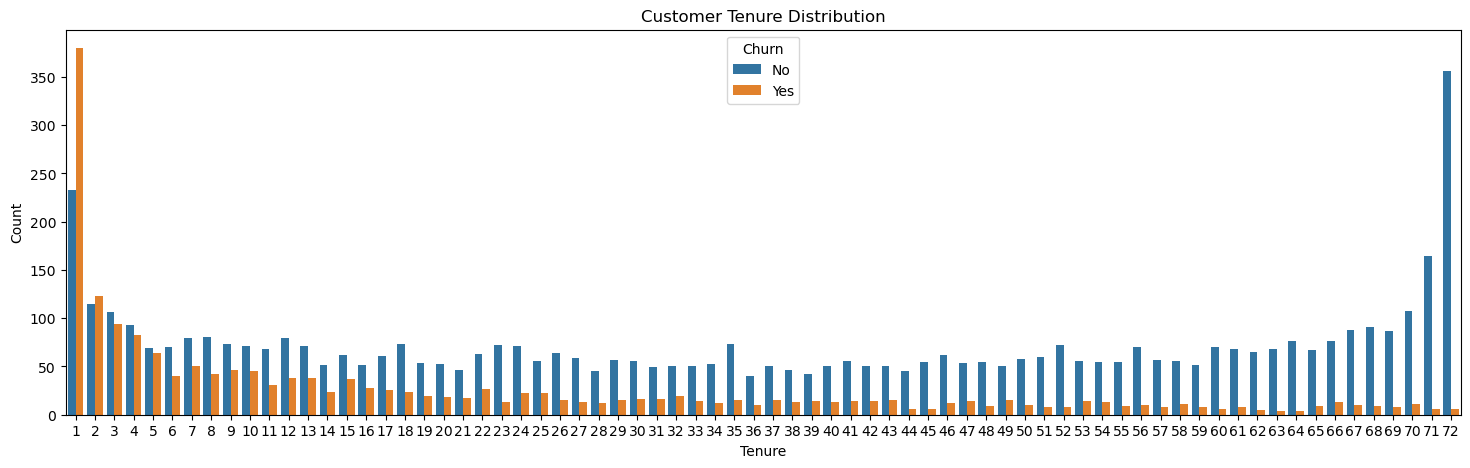

In [32]:
#investigating correlation between tenure and churn

plt.figure(figsize= (18,5))
sns.countplot(x='tenure', data = df, hue='Churn')
plt.xlabel ('Tenure')
plt.ylabel ('Count')
plt.title('Customer Tenure Distribution');

customer churn reduces as they progress within the tenure

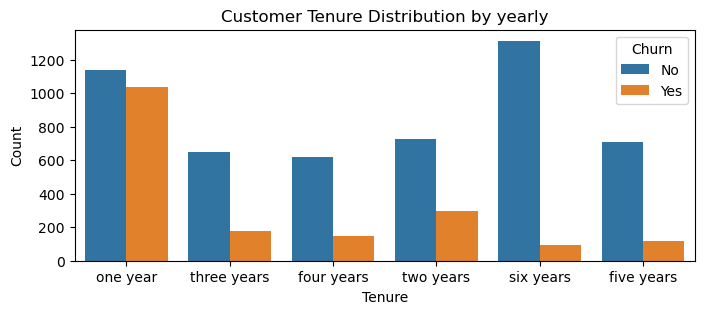

In [33]:
#Grouping customer Tenure

def tenureG (tenure):
    if tenure <= 12:
        return "one year"
    elif tenure <= 24:
        return "two years"
    elif tenure <= 36:
        return "three years"
    elif tenure <= 48:
        return "four years"
    elif tenure <= 60:
        return "five years"
    else:
        return "six years"
    
    
df['tenureG']=df['tenure'].apply(tenureG)

plt.figure(figsize= (8,3))
sns.countplot(x='tenureG', data = df, hue='Churn')
plt.xlabel ('Tenure')
plt.ylabel ('Count')
plt.title('Customer Tenure Distribution by yearly');

Customers with the least tenure are more likely to churn and have the highest churn compared to customers with the highest tenure.

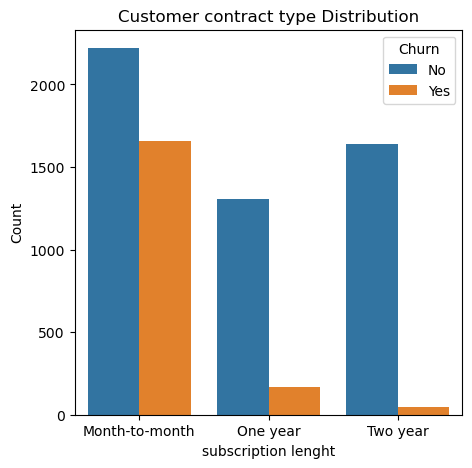

In [34]:
#investigating correlation between contract and churn

plt.figure(figsize= (5,5))
sns.countplot(x='Contract', data = df, hue='Churn')
plt.xlabel ('subscription lenght')
plt.ylabel ('Count')
plt.title('Customer contract type Distribution');

It is discovered that customers with by monthly subscription contract type tend to churn more than those with bi-yearly subcsription contract type.
Univ. analysis carried out previously also shows that majority of customers subscribe to bi-monthly contract type.

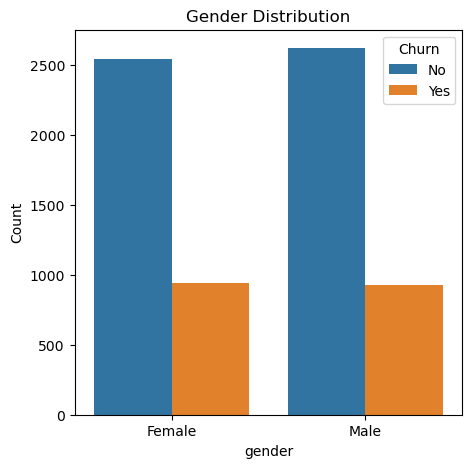

In [35]:
#investigating correlation between gender and churn

plt.figure(figsize= (5,5))
sns.countplot(x='gender', data = df, hue='Churn')
plt.xlabel ('gender')
plt.ylabel ('Count')
plt.title('Gender Distribution');

Gender distribution is fairly equal in correlation to churn hence, gender has no major impact on churn rate.

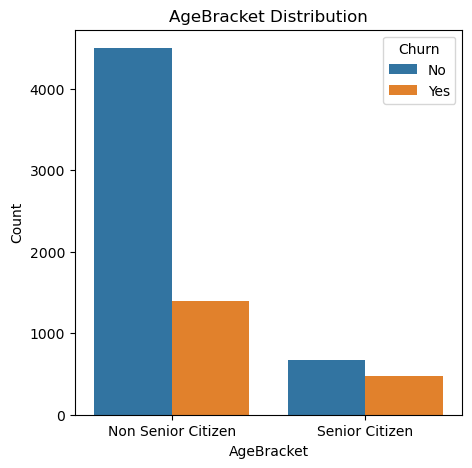

In [36]:
#investigating correlation between agebracket and churn

plt.figure(figsize= (5,5))
sns.countplot(x='AgeBracket', data = df, hue='Churn')
plt.xlabel ('AgeBracket')
plt.ylabel ('Count')
plt.title('AgeBracket Distribution');

Findings shows that most senior citizens tends to churn over non senior citizen...

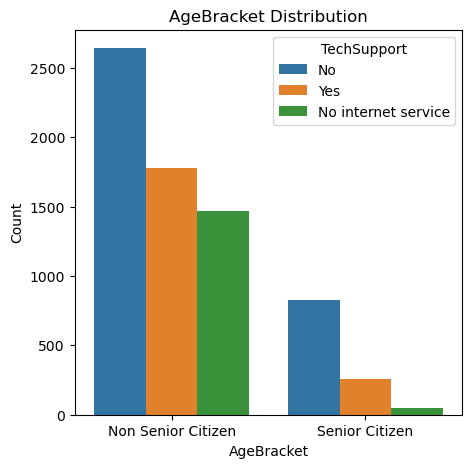

In [37]:
#investigating why almost all senior citizens tend to churn by finding correlation between age bracket and tech support

plt.figure(figsize= (5,5))
sns.countplot(x='AgeBracket', data = df, hue='TechSupport')
plt.xlabel ('AgeBracket')
plt.ylabel ('Count')
plt.title('AgeBracket Distribution');

there are more senior citizens without tech support compared to the non senior citizens

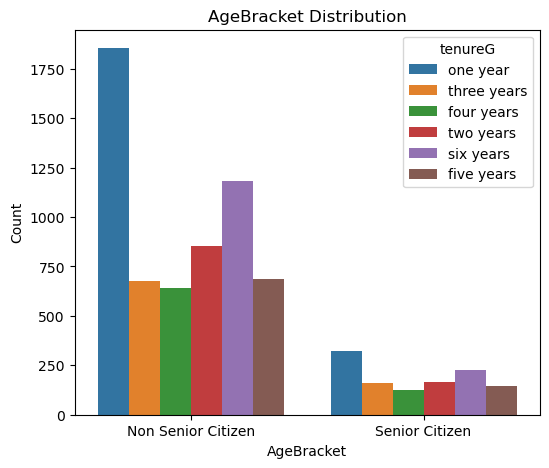

In [38]:
#correlation between age bracket and tenure

plt.figure(figsize= (6,5))
sns.countplot(x='AgeBracket', data = df, hue='tenureG')
plt.xlabel ('AgeBracket')
plt.ylabel ('Count')
plt.title('AgeBracket Distribution');

This shows that a good number of senior citizens are loyal customers and are among customers with the longest tenure.

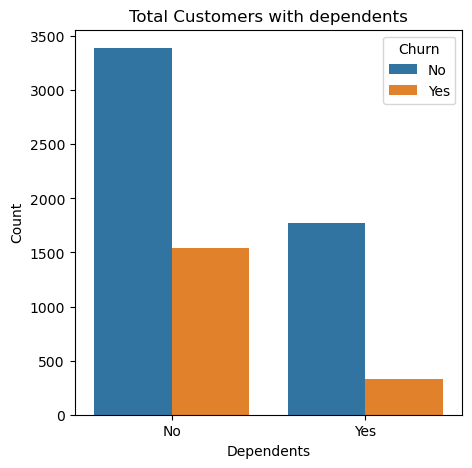

In [39]:
#investigating correlation between dependents and churn 

plt.figure(figsize= (5,5))
sns.countplot(x='Dependents', data = df, hue='Churn')
plt.xlabel ('Dependents')
plt.ylabel ('Count')
plt.title('Total Customers with dependents');

Customers with dependents tend to churn slightly less than customers without dependents
Almost half of customers without dependents tend to churn whereas, customers with dependents churn slightly less.

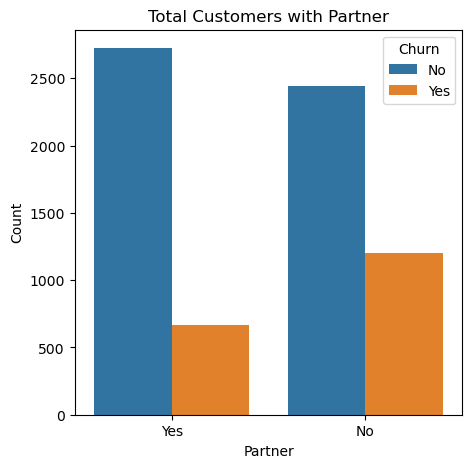

In [40]:
#investigating correlation between customers with 'Partner' and churn

plt.figure(figsize= (5,5))
sns.countplot(x='Partner', data = df, hue='Churn')
plt.xlabel ('Partner')
plt.ylabel ('Count')
plt.title('Total Customers with Partner');

Almost half of customers without partners tend to churn compared to customers with partners.
customers having a partner can cause a decrease in churn.

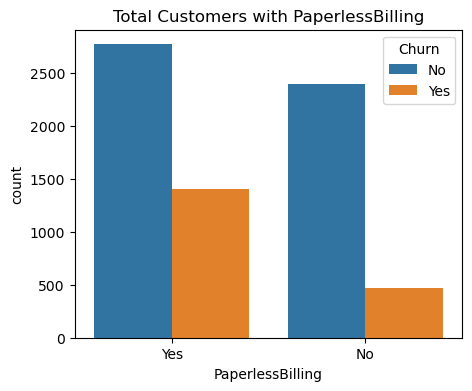

In [41]:
#investigating correlation between customers with 'PaperlessBilling' and churn

plt.figure(figsize= (5,4))
sns.countplot(x='PaperlessBilling', data = df, hue='Churn')
plt.xlabel ('PaperlessBilling')
plt.ylabel ('count')
plt.title('Total Customers with PaperlessBilling');

Customers prefer paperless billing to paper billing in correlation to churn.

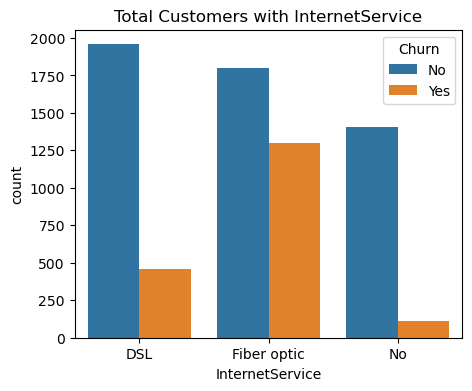

In [42]:
#investigating correlation between customers with 'InternetService' and churn 

plt.figure(figsize= (5,4))
sns.countplot(x='InternetService', data = df, hue='Churn')
plt.xlabel ('InternetService')
plt.ylabel ('count')
plt.title('Total Customers with InternetService');

majority of customers that use fiber Optic tend to churn over others

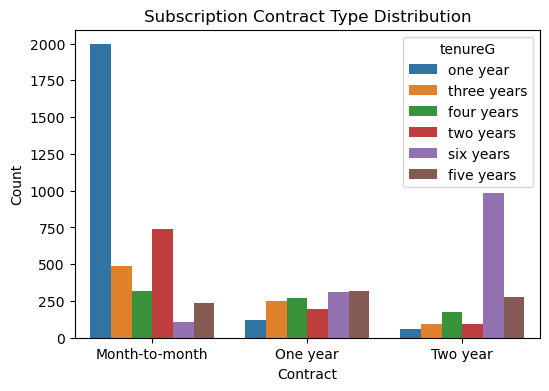

In [43]:
#investigating influence of Contract type on customer loyalty

plt.figure(figsize= (6,4))
sns.countplot(x='Contract', data = df, hue='tenureG')
plt.xlabel ('Contract')
plt.ylabel ('Count')
plt.title('Subscription Contract Type Distribution');

It is discovered that contract type greatly influences tenure (customer loyalty) as customers that subscribe to yearly subscription contract types are more loyal than customers that subscribe to monthly contract types.

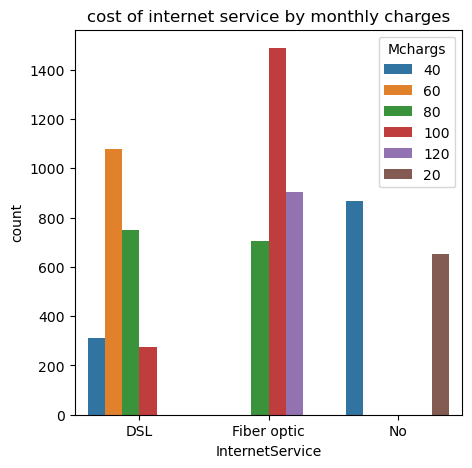

In [44]:
#investigating the relationship between monthly charges and internet service
#grouping monthly charge

#Grouping monthly charges

def Mchargs (MonthlyCharges):
    if MonthlyCharges <= 20:
        return "20"
    elif MonthlyCharges <= 40:
        return "40"
    elif MonthlyCharges <= 60:
        return "60"
    elif MonthlyCharges <= 80:
        return "80"
    elif MonthlyCharges <= 100:
        return "100"
    else:
        return "120"
    
    
df['Mchargs']=df['MonthlyCharges'].apply(Mchargs)

plt.figure(figsize= (5,5))
sns.countplot(x='InternetService', data = df, hue='Mchargs')
plt.xlabel ('InternetService')
plt.ylabel ('count')
plt.title('cost of internet service by monthly charges');

It is observed that the monthly charge of customers who use fibre optive is very high compared to DSL. other insights from the data shows that customers who spend more monthly tend to churn and majority of monthly subscribers use fiber Optic which costs more over DSL.

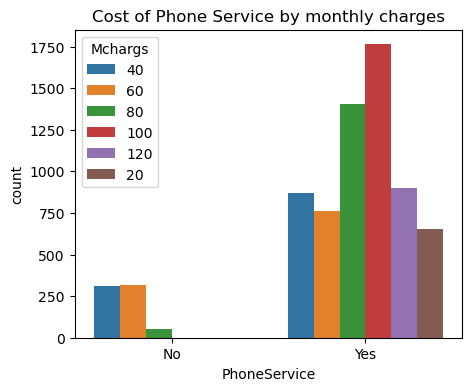

In [45]:
#investigating the relationship between monthly charges and 'PhoneService'

plt.figure(figsize= (5,4))
sns.countplot(x='PhoneService', data = df, hue='Mchargs')
plt.xlabel ('PhoneService')
plt.ylabel ('count')
plt.title('Cost of Phone Service by monthly charges');

customers spend quite a lot on phone service

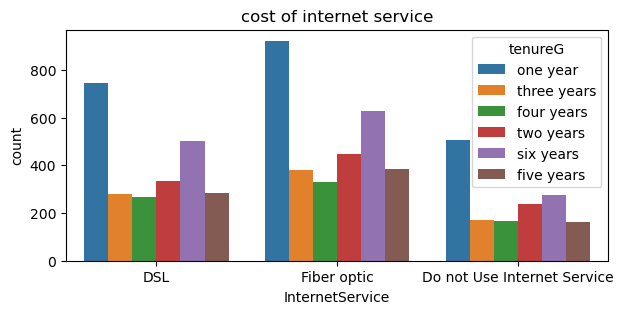

In [46]:
#investigating the relationship between tenureG and internet service

plt.figure(figsize= (7,3))
sns.countplot(x='InternetServicePreference', data = df, hue='tenureG')
plt.xlabel ('InternetService')
plt.ylabel ('count')
plt.title('cost of internet service');

It is observed that there are more loyal customers who use Fiber Optic than DSL.

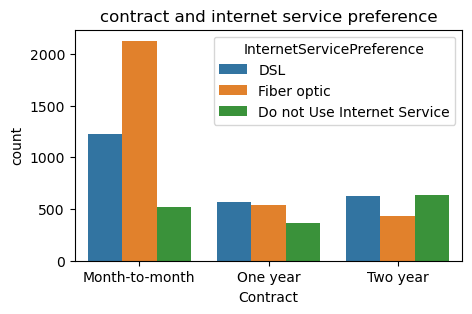

In [47]:
#investigating the relationship between contract and internet service

plt.figure(figsize= (5,3))
sns.countplot(x='Contract', data = df, hue='InternetServicePreference')
plt.xlabel ('Contract')
plt.ylabel ('count')
plt.title('contract and internet service preference');

customers on yearly subscription use slightly more of DSL over Fiber Optic compared to monthly subscribers.

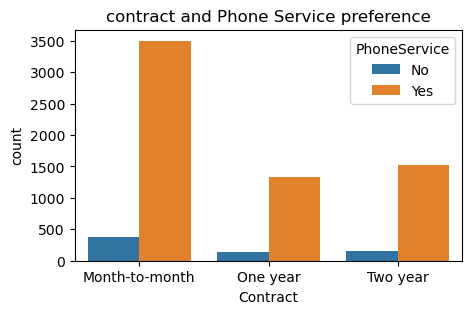

In [48]:
#investigating the relationship between contract and 'PhoneService'

plt.figure(figsize= (5,3))
sns.countplot(x='Contract', data = df, hue='PhoneService')
plt.xlabel ('Contract')
plt.ylabel ('count')
plt.title('contract and Phone Service preference');

majority of customers with higher longevity use phone service over internet service

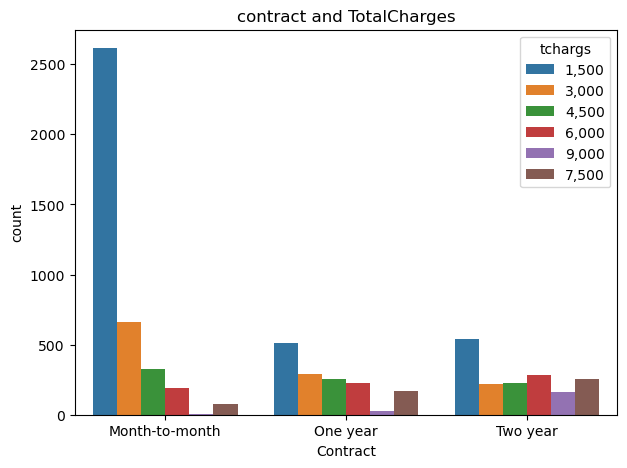

In [49]:
#investigating the relationship between contract and total charges

#grouping total charges

def tchargs (TotalCharges):
    if TotalCharges <= 1500:
        return "1,500"
    elif TotalCharges <= 3000:
        return "3,000"
    elif TotalCharges <= 4500:
        return "4,500"
    elif TotalCharges <= 6000:
        return "6,000"
    elif TotalCharges <= 7500:
        return "7,500"
    else:
        return "9,000"
    
    
df['tchargs']=df['TotalCharges'].apply(tchargs)

plt.figure(figsize= (7,5))
sns.countplot(x='Contract', data = df, hue='tchargs')
plt.xlabel ('Contract')
plt.ylabel ('count')
plt.title('contract and TotalCharges');

it is observed that there is a slightly linear realtionship between total charge and churn where the higher the total charges the less the churn

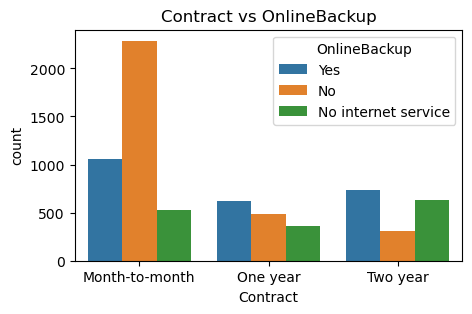

In [50]:
#investigating the relationship between 'StreamingTV' and 'OnlineBackup'
plt.figure(figsize= (5,3))
sns.countplot(x='Contract', data = df, hue='OnlineBackup')
plt.xlabel ('Contract')
plt.ylabel ('count')
plt.title('Contract vs OnlineBackup');

a lot of monthly subscribers do not have online backup

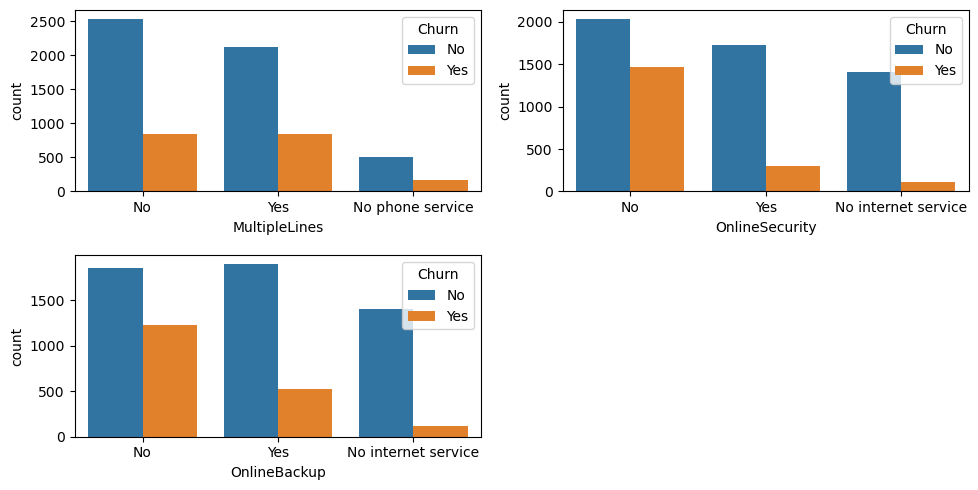

In [51]:
#Investigating the relationship between Churn and other Features

categorical_df=df.select_dtypes(include="object")

feature_list= [ 'MultipleLines','OnlineSecurity', 'OnlineBackup',]
num_cols=2
num_rows=(len(feature_list)+1)//2

fig, axes = plt.subplots(ncols= num_cols, nrows=num_rows,figsize=(10,5))
axes=axes.flatten()

for index, feature in enumerate (feature_list):
    ax=axes[index]
    sns.countplot(data=df, x=feature, ax=ax, order = categorical_df[feature].value_counts().index, hue= "Churn")

plt.tight_layout()
for ax in axes[len(feature_list):]:
    fig.delaxes(ax)



customers who have online backup and online security churn less than those who do not. while having multiple lines does not necessarily affect churn.

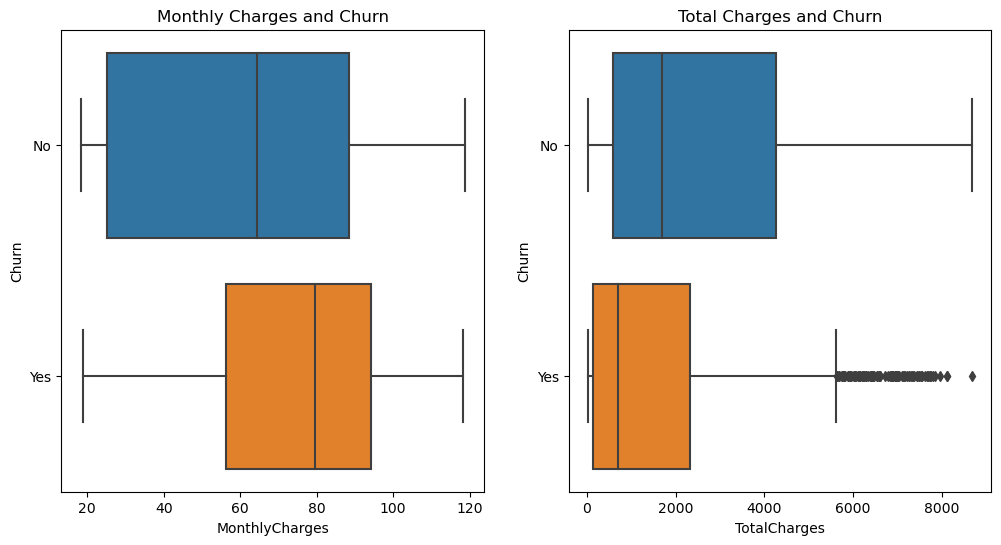

In [52]:
#investigating correlation between customers with 'MonthlyCharges', TotalCharges, and churn 


fig, axs=plt.subplots (nrows=1, ncols=2, figsize=(12,6))

sns.boxplot(x='MonthlyCharges', y='Churn', data=df, ax=axs[0])
axs[0].set_title("Monthly Charges and Churn");

sns.boxplot(x='TotalCharges', y='Churn', data=df, ax=axs[1])
axs[1].set_title("Total Charges and Churn");

When monthly charges are high, churn tends to increase but when total charges are high churn tends to decrease.

### Multivariate Analysis

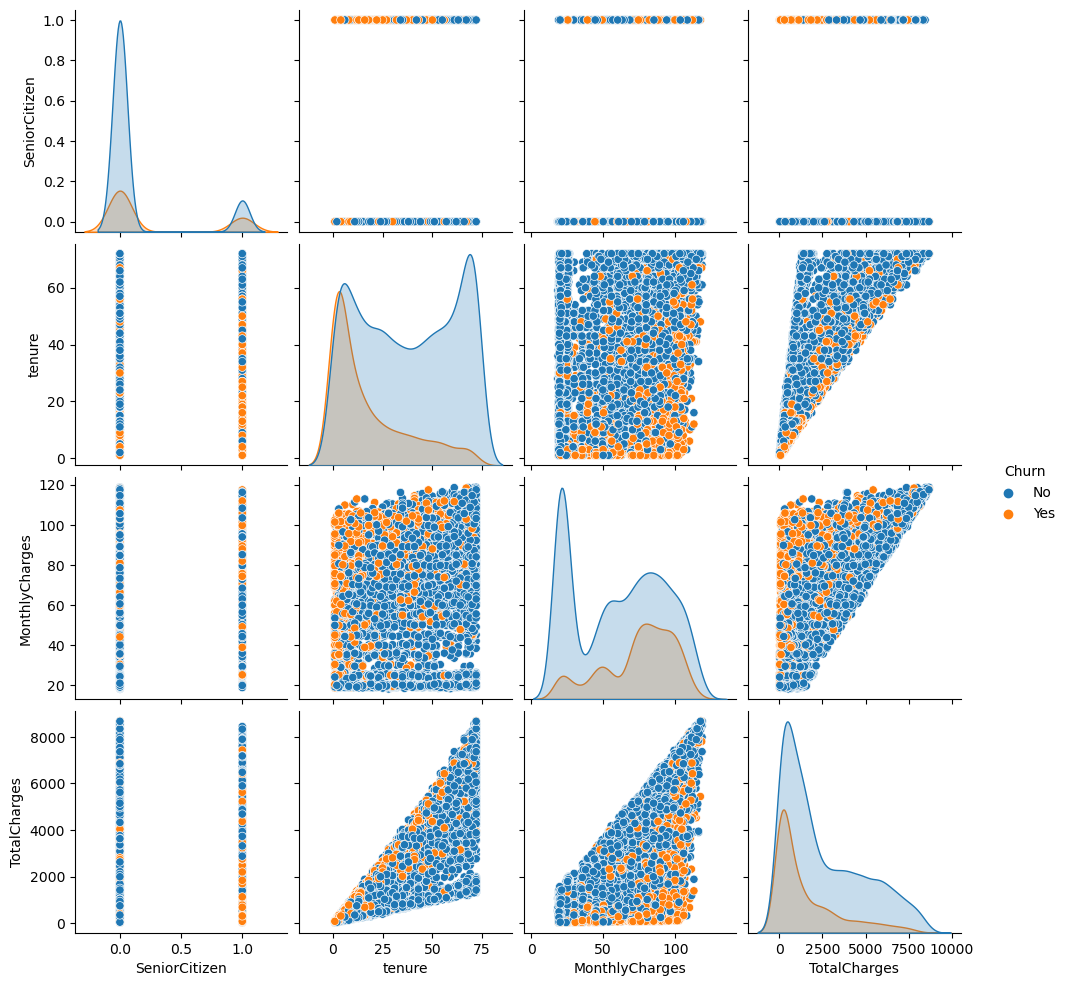

In [53]:
#Investigating the relationship between the numerical variables and Churn using a pair plot 

sns.pairplot(df, hue="Churn")

The following shows that:
senior citizens churn more when tenure is within low to medium. tenure and monthly charge do not have any correlation, however, when monthly charge is high and tenure is low, there is increase in churn. there exists a linear relationship between tenure and total charges.
as monthly charges increase senior citizens tend to churn more. there is a linear relationship between monthly charge and total charge. when monthly charges increase and total charge is low there is more churn.
when total charge is low, senior citizens churn more.there is a linear relationship between total charge and tenure.
all the features have perfect relationship to itself.
non senior citizens are higher in number and have slightly higher churn rate than the senior citizens.
churn is higher when tenure is low.
as total charge increases, churn decreases.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   gender                     7032 non-null   object 
 2   SeniorCitizen              7032 non-null   int64  
 3   Partner                    7032 non-null   object 
 4   Dependents                 7032 non-null   object 
 5   tenure                     7032 non-null   int64  
 6   PhoneService               7032 non-null   object 
 7   MultipleLines              7032 non-null   object 
 8   InternetService            7032 non-null   object 
 9   OnlineSecurity             7032 non-null   object 
 10  OnlineBackup               7032 non-null   object 
 11  DeviceProtection           7032 non-null   object 
 12  TechSupport                7032 non-null   object 
 13  StreamingTV                7032 non-null   object 
 1

In [55]:
numerical_df=df.select_dtypes(include=["float64","int64"])

numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


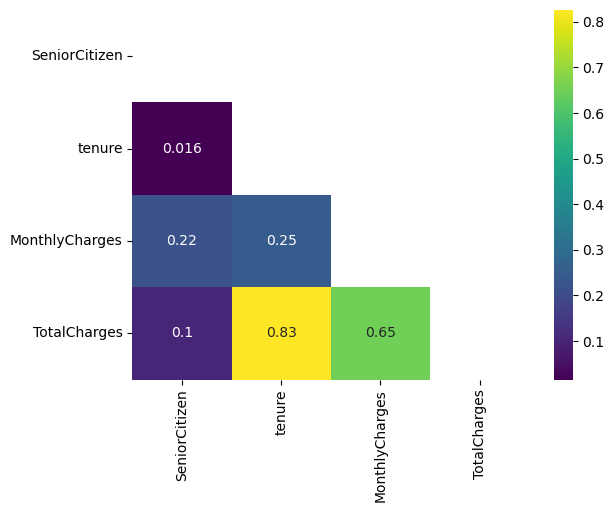

In [56]:
mask = np.triu(np.ones_like(numerical_df.corr(), dtype= bool))
sns.heatmap(data=numerical_df.corr(),cmap="viridis", annot=True, mask= mask);

The following shows that:

All the features have a perfect correlation to itself.
There is almost no corr. between senior citizen to tenure, while monthly charges and total charges have very weak correlation against senior citizen.
Tenure has almost no Corr. to senior citizen, very weak correlation to monthly charges, but very strong correlation to total charges.
Monthly charges has a fairly strong correlation to total charges, and very weak correlation to tenure and senior citizen.
Total charges is very strongly correlated to tenure, fairly strong Corr. to monthly charges but very weakly correlated to senior citizen.
All the features are positively correlated to each other.

## Feature Engineering

#### Feature creation and variable encoding

In [57]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AgeBracket', 'InternetServicePreference', 'tenureG', 'Mchargs',
       'tchargs'],
      dtype='object')

In [58]:
#removing irrelevant features and creating a new dataset

df1=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn']]

In [59]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [60]:
#encodinhg categorical features to numerical using pandas one_hot encoding

df1= pd.get_dummies(df1,columns=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'],dtype= "int64", drop_first=True)

In [61]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [62]:
#removing target variable from data set

y=df1.pop('Churn_Yes')

In [63]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7032, dtype: int64

In [64]:
df1.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [65]:
#scaling the data

scaler= StandardScaler()

scaled_df1=pd.DataFrame(scaler.fit_transform (df1),columns=df1.columns)

scaled_df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604


In [66]:
#splitting data into training and evaluation datasets

X_train,X_test,y_train,y_test = train_test_split(scaled_df1,y, test_size=0.2, random_state=1)

In [67]:
y_test

1778    0
5036    1
1106    0
1665    0
927     1
       ..
6794    0
6288    0
5256    1
2203    0
4793    0
Name: Churn_Yes, Length: 1407, dtype: int64

### BUILDING AND TRAINING MACHINE LEARNING MODELS

1. ##### LOGISTIC REGRESSION MODEL

In [68]:
#building and training machine learning models 
#Using Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train, y_train)

log_pred=logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,log_pred))
print("Precision:", precision_score(y_test,log_pred))
print("Recall:", recall_score(y_test,log_pred))
print("F1-score:", f1_score(y_test,log_pred))
print("AUC-ROC:", roc_auc_score(y_test,log_pred))

Logistic Regression
Accuracy: 0.7967306325515281
Precision: 0.6290322580645161
Recall: 0.5327868852459017
F1-score: 0.576923076923077
AUC-ROC: 0.7111580919985513


The result of the evaluation shows that the ML model has 79.7% or 80% total prediction accuracy of instances in the data set.
AUC-ROC is 71%
however, precision, recall and F1-score are 62.9%, 53%, and 57.6%. There is room for improvement in this area.
Logistic Regression Alg. is the most accurate ML model out of the three models used to predict the target variable for this dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

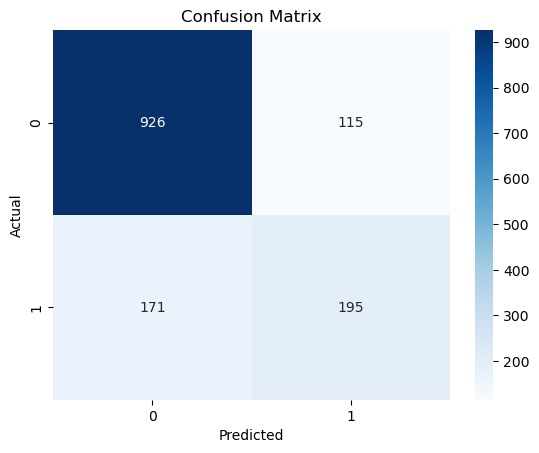

In [69]:
#Creating Confusion Matrix

lcm=confusion_matrix(y_test,log_pred)

#visualizing the confusion matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

Confusion Matrix shows that LR model was able to give 926 accurate Positive predictions, and 195 accurate Negative predictions from 20% of the instances in the dataset.
however, there were 115 False Positives and 171 False Negatives. This model is the best for the dataset out of three models used because it has the lowest number of False Negatives (which shows that the predicted value is negative but the actual is positive)  

2. ##### RANDOM FOREST MODEL

In [70]:
#using Random Forest

rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred=rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test,rfc_pred))
print("Precision:", precision_score(y_test,rfc_pred))
print("Recall:", recall_score(y_test,rfc_pred))
print("F1-score:", f1_score(y_test,rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test,rfc_pred))

Random Forest Classifier
Accuracy: 0.7945984363894811
Precision: 0.64
Recall: 0.4808743169398907
F1-score: 0.5491419656786272
AUC-ROC: 0.6928867261932883


The result of the evaluation shows that the ML model has a 79.8% total prediction accuracy of instances in the data set, while AUC-ROC is 69.8% which are lower than the previous model.
however,
Precision with 64.7%
Recall with 49%
and F1-score with 55.9%. There is room for improvement in these areas.

<function matplotlib.pyplot.show(close=None, block=None)>

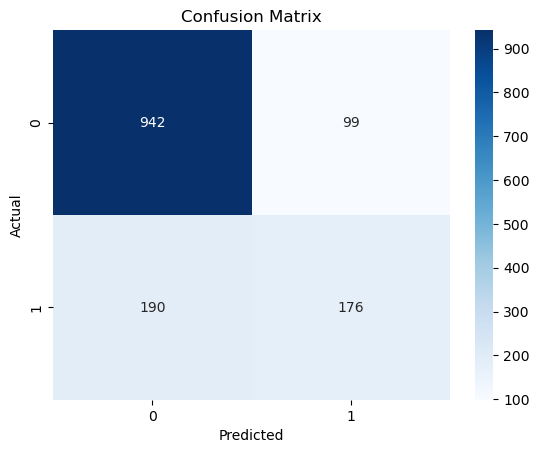

In [71]:
#Creating Confusion matrix

lcm=confusion_matrix(y_test,rfc_pred)

#visualizing the confusion matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

Confusion Matrix shows that Random Forest model gave 943 accurate Positive predictions, and 180 accurate Negative predictions from 20% of the instances in the dataset.
There were 98 False Positives and 186 False Negatives. The True positives are relatively higher than the LR model which is good, however, The False Negative increased which means that there are more instances of inaccurate predictions that the target variable is Negative when it is actually Positive.

3. ##### DECISION TREE CLASSIFIER

In [72]:
#using Decision Tree Classifier

clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_pred= clf.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test,clf_pred))
print("Precision:", precision_score(y_test,clf_pred))
print("Recall:", recall_score(y_test,clf_pred))
print("F1-score:", f1_score(y_test,clf_pred))
print("AUC-ROC:", roc_auc_score(y_test,clf_pred))

Decision Tree Classifier
Accuracy: 0.7256574271499645
Precision: 0.475
Recall: 0.5191256830601093
F1-score: 0.4960835509138381
AUC-ROC: 0.6586982882159336


The result of the evaluation shows that the ML model has a 72% total prediction accuracy of instances in the data set, while AUC-ROC is 64.9% which are lower than both previously used models.
While,
Precision with 46.6%
Recall with 50%
and F1-score with 48% are relatively lower than all the other models used.
It is the least accurate of the three models in predicting the target variable of the data set.

<function matplotlib.pyplot.show(close=None, block=None)>

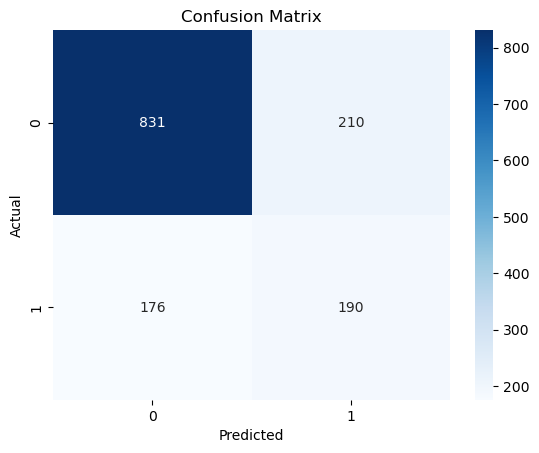

In [73]:
#Creating Confusion matrix

lcm=confusion_matrix(y_test,clf_pred)

#visualizing the confusion matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

Confusion Matrix shows that Random Forest model gave 832 accurate Positive predictions, and 183 accurate Negative predictions from 20% of the instances in the dataset. Which is low compared to the other models.
There are 209 False Positives and 183 False Negatives. The False Negatives are relatively lower than the Decision Tree Classifier model, which is good and could be considered over the DTC though other aspects of its predictions are lower.